In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import matplotlib.pyplot as plt

In [ ]:
# 1. 데이터 생성
num_data = 2000
num_epoch = 10000

x = init.uniform_(torch.Tensor(num_data,1), -20, 20)
noise = init.normal_(torch.FloatTensor(num_data,1), std=1)

y = x**3+ 3*x**2 + 5
y_noise = y + noise

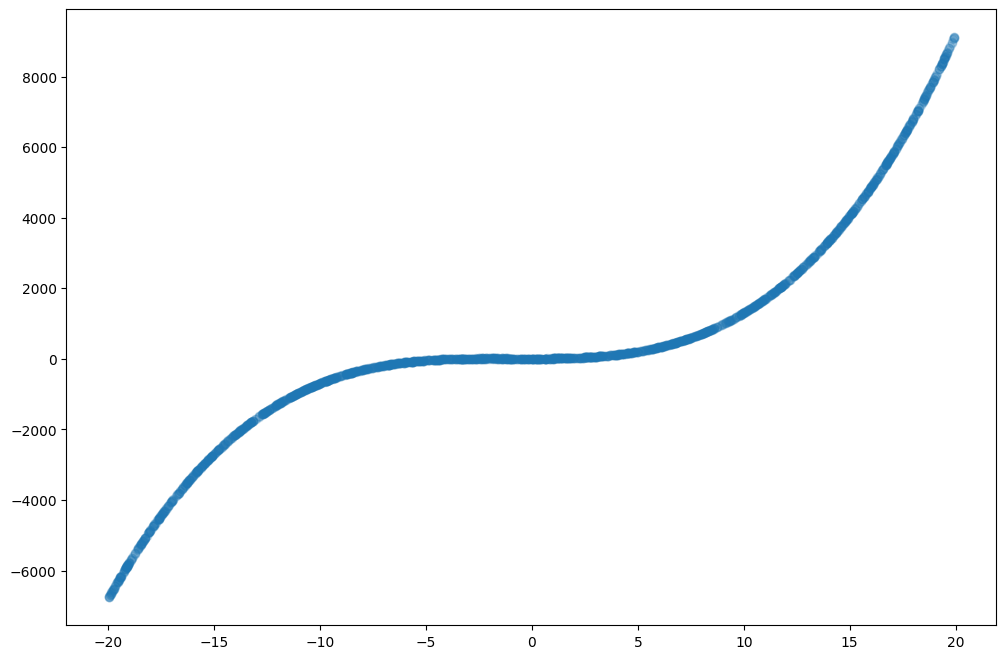

In [ ]:
# 1-1. 데이터 시각화

plt.figure(figsize=(12,8))
plt.scatter(x, y_noise, alpha=0.2)
plt.show()

## **1차 실험**

In [ ]:
# 1-1. 모델 정의 - 1->10->20->20->10->1

model = nn.Sequential(
    nn.Linear(1,10),
    nn.ReLU(),
    nn.Linear(10,20),
    nn.ReLU(),
    nn.Linear(20,20),
    nn.ReLU(),
    nn.Linear(20,10),
    nn.ReLU(),
    nn.Linear(10,1),
)

# loss function - MAE loss
loss_func = nn.L1Loss()
optimizer = optim.SGD(model.parameters(), lr=0.0002)

In [ ]:
## 1-2. 모델 학습 진행
loss_array = []

for i in range(num_epoch):
  optimizer.zero_grad()
  output = model(x)

  loss = loss_func(output,y_noise)
  loss.backward()
  optimizer.step()

  loss_array.append(loss.detach().numpy() )

  if i % 500 == 0:
    print(f'Epoch {i} Loss : {loss}')

Epoch 0 Loss : 2015.0712890625
Epoch 500 Loss : 2014.949951171875
Epoch 1000 Loss : 2014.8177490234375
Epoch 1500 Loss : 2014.594970703125
Epoch 2000 Loss : 2014.0689697265625
Epoch 2500 Loss : 2011.9842529296875
Epoch 3000 Loss : 1955.583251953125
Epoch 3500 Loss : 970.9196166992188
Epoch 4000 Loss : 815.9039916992188
Epoch 4500 Loss : 379.2965393066406
Epoch 5000 Loss : 515.4453735351562
Epoch 5500 Loss : 494.99212646484375
Epoch 6000 Loss : 465.6554870605469
Epoch 6500 Loss : 240.88685607910156
Epoch 7000 Loss : 418.7131652832031
Epoch 7500 Loss : 445.162353515625
Epoch 8000 Loss : 431.3005065917969
Epoch 8500 Loss : 343.1820373535156
Epoch 9000 Loss : 336.6529541015625
Epoch 9500 Loss : 234.12225341796875


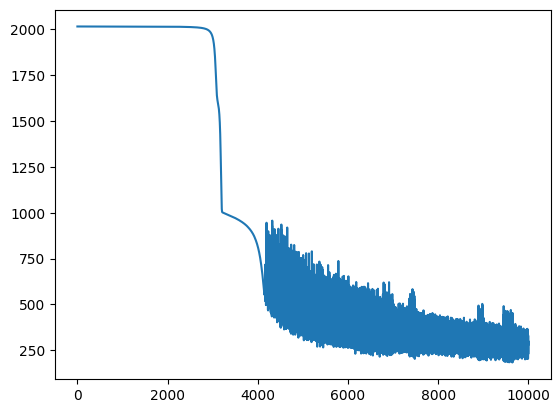

In [ ]:
## 1-3. loss function 시각화
plt.plot(loss_array)
plt.show()

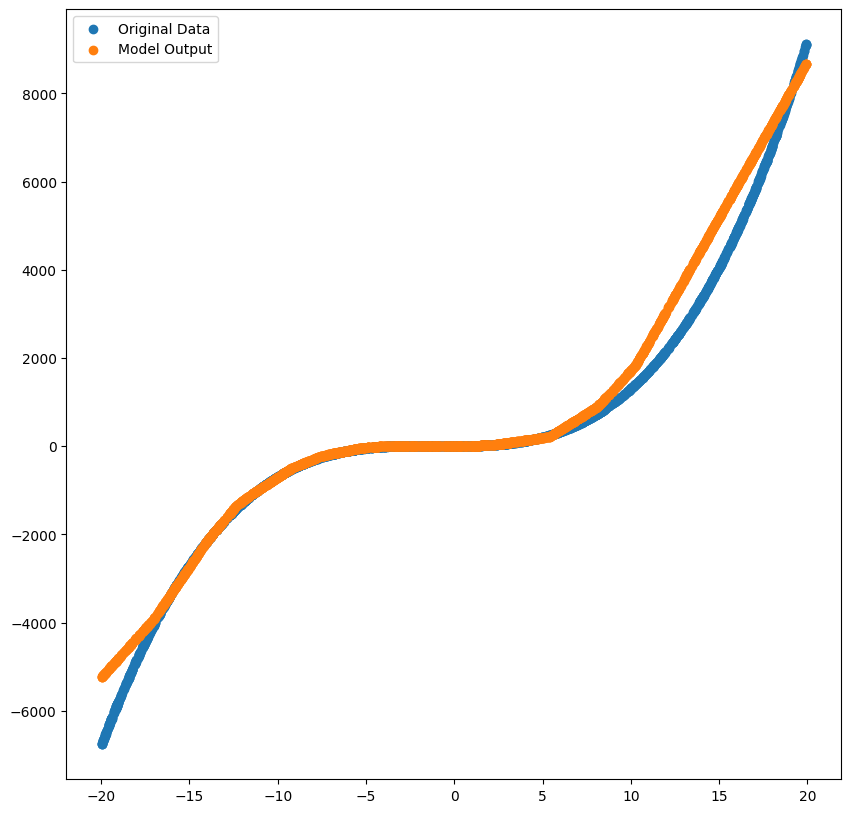

In [ ]:
## 1-4. model output 확인

plt.figure(figsize=(10,10))
plt.scatter(x.detach().numpy(), y_noise, label='Original Data')
plt.scatter(x.detach().numpy(), output.detach().numpy(), label='Model Output')
plt.legend()
plt.show()

## **2차 실험**
- learning rate : 0.00002
- mini batch 적용 (batch size : 100)

In [ ]:
# 2-1. 모델 정의 - 1->10->20->20->10->1

model2 = nn.Sequential(
    nn.Linear(1,10),
    nn.ReLU(),
    nn.Linear(10,20),
    nn.ReLU(),
    nn.Linear(20,20),
    nn.ReLU(),
    nn.Linear(20,10),
    nn.ReLU(),
    nn.Linear(10,1),
)

# loss function - MAE loss
loss_func = nn.L1Loss()
optimizer = optim.SGD(model2.parameters(), lr=0.00002) #learning rate 변경

In [ ]:
from torch.utils.data import Dataset, DataLoader, TensorDataset

## 2-2. 모델 학습 진행
# 배치 크기 정의
new_epoch = 10000
batch_size = 100

# 데이터셋과 DataLoader 정의
dataset = TensorDataset(x, y_noise)  # x와 y_noise를 TensorDataset으로 묶기
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)  # DataLoader를 사용하여 데이터셋 로드

loss_array2 = []

# 학습 루프 변경
for epoch in range(new_epoch):
    for batch_idx, (x_batch, y_batch) in enumerate(dataloader):
        optimizer.zero_grad()
        output = model2(x_batch)
        loss = loss_func(output, y_batch)
        loss.backward()
        optimizer.step()

    # 매 에폭마다의 평균 손실을 저장
    loss_array2.append(loss.item())

    if epoch % 500 == 0:
        print(f'Epoch {epoch} Loss: {loss.item()}')


Epoch 0 Loss: 44.171875
Epoch 500 Loss: 30.346420288085938
Epoch 1000 Loss: 19.420665740966797
Epoch 1500 Loss: 22.374591827392578
Epoch 2000 Loss: 12.394272804260254
Epoch 2500 Loss: 44.115787506103516
Epoch 3000 Loss: 44.515045166015625
Epoch 3500 Loss: 61.85560607910156
Epoch 4000 Loss: 51.349849700927734
Epoch 4500 Loss: 22.286476135253906
Epoch 5000 Loss: 36.80561447143555
Epoch 5500 Loss: 31.87646484375
Epoch 6000 Loss: 40.92283248901367
Epoch 6500 Loss: 18.277034759521484
Epoch 7000 Loss: 41.21009826660156
Epoch 7500 Loss: 32.686519622802734
Epoch 8000 Loss: 39.407161712646484
Epoch 8500 Loss: 20.60565757751465
Epoch 9000 Loss: 33.67488098144531
Epoch 9500 Loss: 34.268428802490234


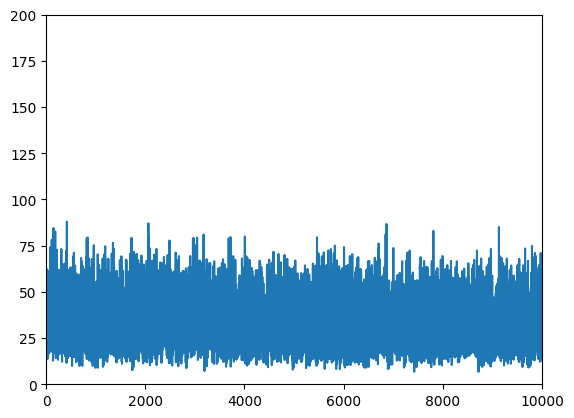

In [29]:
## 2-3. loss function 시각화
plt.plot(loss_array2)
plt.axis([0,10000, 0, 200])
plt.show()

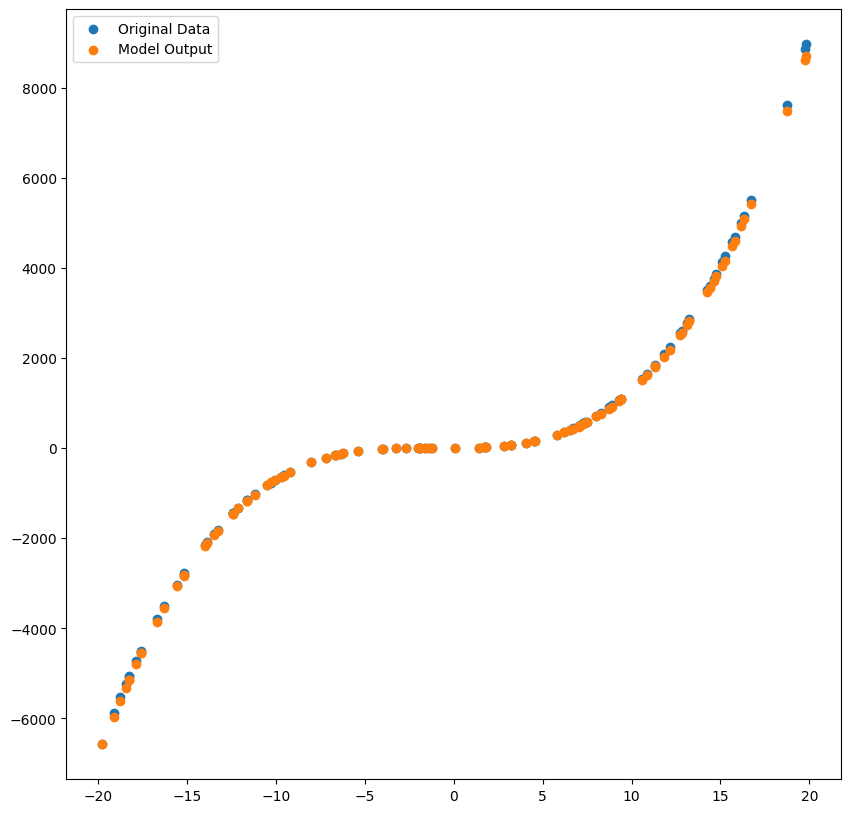

In [ ]:
## 2-4. model output 확인

plt.figure(figsize=(10,10))
plt.scatter(x_batch.detach().numpy(), y_batch, label='Original Data')
plt.scatter(x_batch.detach().numpy(), output.detach().numpy(), label='Model Output')
plt.legend()
plt.show()